# Challenge: Machine Learning for Drone Identification
In this Jupyter notebook are contained the short answers/invocations of appropriate code in response to the assignment components of the challenge in question. However, most of the long-winded implementation is hidden away in `.py` files we wrote, that are imported here. Thus, for this to work, it is recommended you clone the entirety of [our associated Github repo](https://github.com/DanielShteinbok/CANSOFCOM_Drone_2021), and opening the Jupyter notebook contained within that (it's this one, but its location within the repo simply ensures that local imports work properly with minimal troubleshooting).

**Additional dependencies** are as follows:
* `scipy`
* `numpy`
* `matplotlib`

**TODO:** add further dependencies for ML...


In [7]:
# This is our implementation of the signal returned from the drone
import drone_signal

# See additional dependencies:
import scipy.signal
import numpy
import matplotlib.pyplot

## 1. Implement Time-Domain Radar Return Signals from Drones
The actual implementation for this is contained within the function `drone_signal.return_signal_array`. The variables we chose as representative values are set in a code block below, and the meanings are as follow:


`Ar` is $A_r$ in the equation, the real scale factor,

`L1` is $L_1$ in the equation, the distance of the blade roots from the centre of rotation in metres,

`L2` is $L_2$ in the equation, the distance of the blade tips from the centre of rotation in metres,

`N` is $N$ in the equation, number of blades,

`R` is $R$ in the equation, range of the centre of rotation (distance from the radar receiver) in metres,

`Vrad` is $V_{rad}$ in the equation, radial velocity in metres per second,

`lam` is $\lambda$ in the equation, the wavelength of the transmitted signal in metres,

`theta` is $\theta$ in the equation, the angle between the plane of rotation and the line of sight from the radar to the centre of rotation, in radians

`fc` is $f_c$ in the equation, the transmitted frequency (assumed to be $f_c = \frac{c}{\lambda}$, where $c$ is the speed of light

`frot` is $f_{rot}$ in the equation, the frequency of rotation in Hertz

In [8]:
Ar = 1
L1 = 0.25
L2 = 1
N = 4
R = 0
Vrad = 0

theta = 0
lam = 0.2 #wavelength wavelength = c / frequency
fc = 299792458/lam #60 GHz
fs = 10000000 #sampling frequency
frot = 40 #frequency of drone prop rotation

The next step is to create the numpy array of the times at which the returning frequency is sampled:

In [9]:
# we are looking at a 0.1 second interval starting at 0 and iterating by
# the time between samples
time_array = numpy.arange(0, 0.1, 1/fs)

And now, we will actually use the written function to simulate the returned signal. The amplitude is the real component of the returned signal wave function:

In [10]:
amplitudes_array = drone_signal.return_signal_array(Ar, L1, L2, N, R, Vrad, lam, theta, fc, frot, time_array).real

Here, we plot the amplitude as a function of time over the sampled period, discarding the imaginary component. 

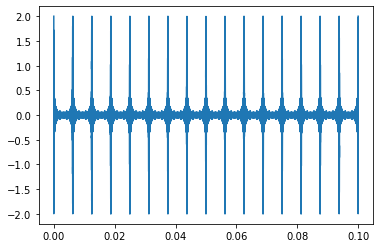

In [11]:
matplotlib.pyplot.plot(time_array, amplitudes_array)

For the Short-Time Fourier Transform (STFT), the two useful tapered window sizes (as per the first reference in the assignment PDF) are either smaller than the period of the rotation, or larger than the period of rotation. Respectively, the small and large window sizes we use here will be $\frac{1}{2f_{rot}}$ and $\frac{2}{f_{rot}}$.

In [35]:
small_window = 0.5/frot
s_f, s_t, s_Zxx = scipy.signal.stft(amplitudes_array, 1/small_window)

large_window = 2/frot
l_f, l_t, l_Zxx = scipy.signal.stft(amplitudes_array, 1/large_window)

To plot the short-window STFT:

In [43]:
s_t

array([0.00000e+00, 1.60000e+00, 3.20000e+00, ..., 1.24976e+04,
       1.24992e+04, 1.25008e+04])

In [38]:
fc

1498962290.0

In [24]:
s_Zxx

array([[ 7.79615090e-03+0.00000000e+00j,  6.28621020e-06+0.00000000e+00j,
         2.81952519e-05+0.00000000e+00j, ...,
        -2.77559392e-05+0.00000000e+00j,  3.44576567e-03+0.00000000e+00j,
         4.38738401e-03+0.00000000e+00j],
       [-7.82898903e-03-9.38345081e-04j,  6.33979199e-06-3.58476623e-06j,
         2.84367405e-05+1.32803350e-06j, ...,
        -2.79972699e-05-1.68806649e-06j,  4.75611655e-04+3.43465845e-03j,
        -4.54784534e-04-4.37498314e-03j],
       [ 7.79558516e-03+1.88292532e-03j,  6.50283161e-06-7.27244809e-06j,
         2.91716120e-05+2.69403189e-06j, ...,
        -2.87156659e-05-3.42134025e-06j, -3.42266273e-03+9.36551375e-04j,
        -4.36847664e-03+9.42356790e-04j],
       ...,
       [ 7.81271380e-03-2.13737580e-04j, -8.29315678e-08+4.01144216e-08j,
        -3.68152635e-07-1.50064756e-08j, ...,
         3.61627369e-07+1.76472717e-08j, -3.85288665e-03-1.06840512e-04j,
        -3.95988529e-03-1.06873134e-04j],
       [-7.81228666e-03+1.06851506e-04j, -8.

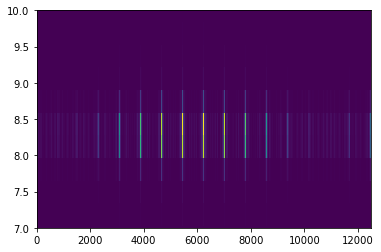

In [42]:
matplotlib.pyplot.ylim(7, 10)
s_plot = matplotlib.pyplot.pcolormesh(s_t, s_f, numpy.abs(s_Zxx), shading="auto")